# Multi-Dimensional Interpolation
- **Purpose**: Interpolate 2D/3D gridded and scattered data
- **scipy.interpolate**: interp2d, griddata, RegularGridInterpolator
- **Applications**: Surface fitting, image processing, geospatial data

Key concepts:
- **2D grid**: Regular (xi, yj) → f(xi, yj)
- **Scattered data**: Irregular (x, y) → f(x, y)
- **Methods**: Linear, cubic, nearest, RBF
- **Delaunay triangulation**: For scattered data

Real applications:
- **Image processing**: Upscaling, rotation, warping
- **GIS**: Elevation maps, temperature fields
- **Finance**: Volatility surfaces (strike × maturity)
- **Physics**: Field interpolation, mesh data
- **ML**: Feature engineering, data augmentation

In [1]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.set_printoptions(precision=4, suppress=True)
plt.style.use('seaborn-v0_8-darkgrid')

print("Multi-dimensional interpolation module loaded")

Multi-dimensional interpolation module loaded


## 2D Regular Grid Interpolation

**Setup**: Data on regular (x, y) grid

**Function**: `RegularGridInterpolator`
- Fast and efficient
- Handles any dimension
- Linear, nearest interpolation

**Use when**: Data naturally on grid (images, simulations)

2D Regular Grid Interpolation
  Coarse grid: 6 × 6 = 36 points
  Function: f(x,y) = sin(x)·cos(y)

Fine grid: 50 × 50 = 2500 points

Interpolation error:
  Max error: 0.9998
  RMS error: 0.6458


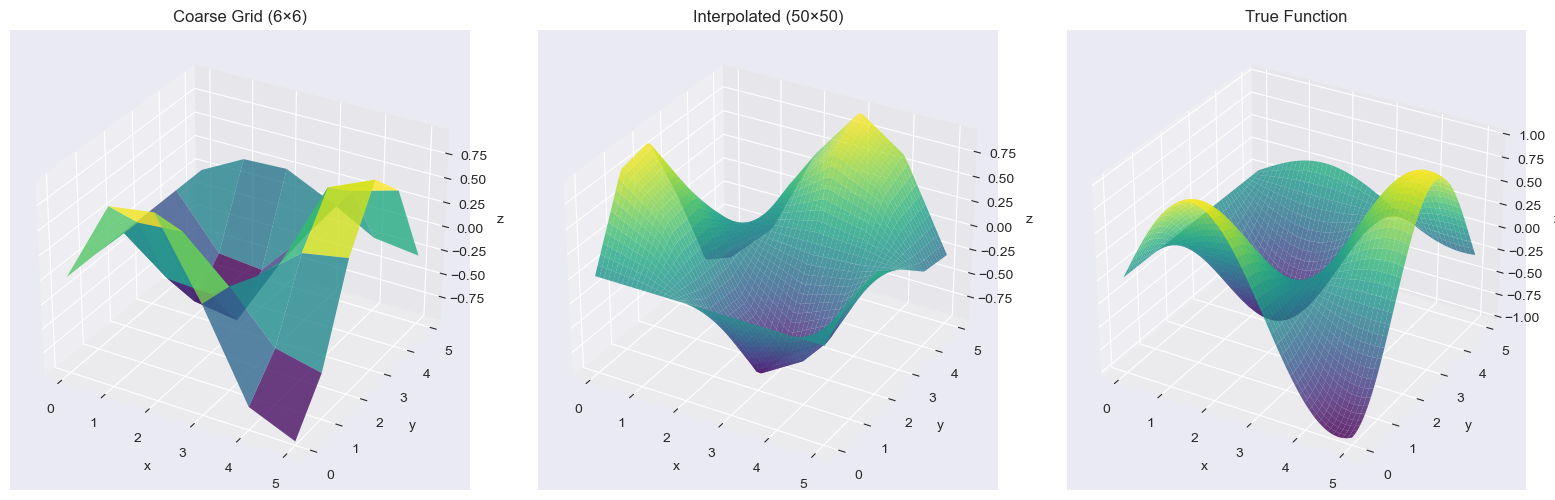


RegularGridInterpolator efficiently upsamples gridded data!


In [2]:
# Create 2D function on coarse grid
x_coarse = np.linspace(0, 5, 6)
y_coarse = np.linspace(0, 5, 6)
X_coarse, Y_coarse = np.meshgrid(x_coarse, y_coarse)

# Function: f(x,y) = sin(x) * cos(y)
Z_coarse = np.sin(X_coarse) * np.cos(Y_coarse)

print("2D Regular Grid Interpolation")
print(f"  Coarse grid: {len(x_coarse)} × {len(y_coarse)} = {len(x_coarse)*len(y_coarse)} points")
print(f"  Function: f(x,y) = sin(x)·cos(y)\n")

# Interpolator
f_interp = interpolate.RegularGridInterpolator(
    (x_coarse, y_coarse), Z_coarse, method='linear'
)

# Evaluate on fine grid
x_fine = np.linspace(0, 5, 50)
y_fine = np.linspace(0, 5, 50)
X_fine, Y_fine = np.meshgrid(x_fine, y_fine)

# Need to reshape for interpolator
points = np.array([X_fine.ravel(), Y_fine.ravel()]).T
Z_interp = f_interp(points).reshape(X_fine.shape)

# True function for comparison
Z_true = np.sin(X_fine) * np.cos(Y_fine)

print(f"Fine grid: {len(x_fine)} × {len(y_fine)} = {len(x_fine)*len(y_fine)} points")
print(f"\nInterpolation error:")
print(f"  Max error: {np.abs(Z_interp - Z_true).max():.4f}")
print(f"  RMS error: {np.sqrt(np.mean((Z_interp - Z_true)**2)):.4f}")

# Visualize
fig = plt.figure(figsize=(16, 5))

# Coarse data
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X_coarse, Y_coarse, Z_coarse, cmap='viridis', alpha=0.8)
ax1.set_title('Coarse Grid (6×6)', fontsize=12)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

# Interpolated
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X_fine, Y_fine, Z_interp, cmap='viridis', alpha=0.8)
ax2.set_title('Interpolated (50×50)', fontsize=12)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')

# True function
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X_fine, Y_fine, Z_true, cmap='viridis', alpha=0.8)
ax3.set_title('True Function', fontsize=12)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')

plt.tight_layout()
plt.show()

print("\nRegularGridInterpolator efficiently upsamples gridded data!")

## Scattered Data Interpolation

**Problem**: Data at irregular (x, y) points

**Function**: `griddata(points, values, xi, method)`

**Methods**:
- `'linear'`: Delaunay triangulation + linear
- `'cubic'`: Smooth but slower
- `'nearest'`: Voronoi regions

**Use cases**: Sensor networks, GPS data, survey measurements

Scattered Data Interpolation
  50 irregular data points
  Interpolate to regular grid



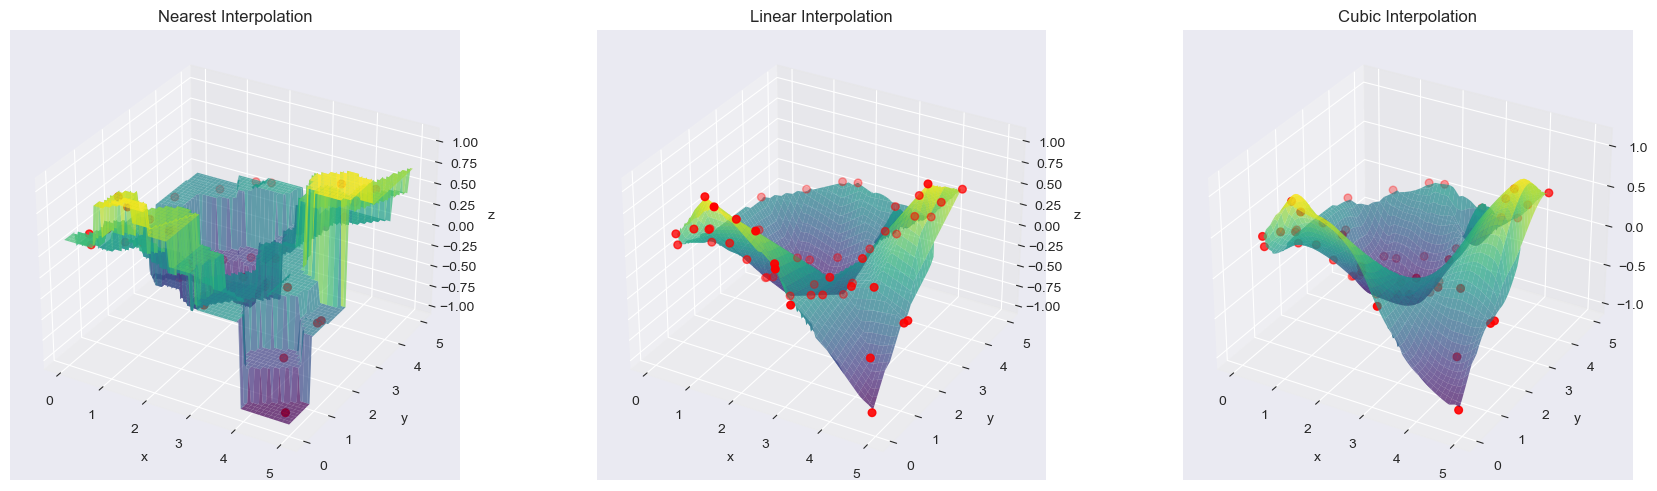

Key differences:
  - Nearest: Blocky, fast, no smoothing
  - Linear: Piecewise planar, good default
  - Cubic: Smoothest, slowest, can overshoot


In [3]:
# Scattered data points (irregular)
np.random.seed(42)
n_points = 50
x_scatter = np.random.uniform(0, 5, n_points)
y_scatter = np.random.uniform(0, 5, n_points)
z_scatter = np.sin(x_scatter) * np.cos(y_scatter) + np.random.randn(n_points)*0.1

print("Scattered Data Interpolation")
print(f"  {n_points} irregular data points")
print(f"  Interpolate to regular grid\n")

# Target regular grid
xi = np.linspace(0, 5, 100)
yi = np.linspace(0, 5, 100)
Xi, Yi = np.meshgrid(xi, yi)

# Interpolation methods
methods = ['nearest', 'linear', 'cubic']

fig, axes = plt.subplots(1, 3, figsize=(18, 5), subplot_kw={'projection': '3d'})

for ax, method in zip(axes, methods):
    # Interpolate
    Zi = interpolate.griddata(
        (x_scatter, y_scatter), z_scatter, (Xi, Yi), method=method
    )
    
    # Plot
    ax.plot_surface(Xi, Yi, Zi, cmap='viridis', alpha=0.7)
    ax.scatter(x_scatter, y_scatter, z_scatter, c='red', s=30, 
              label='Data points', zorder=10)
    ax.set_title(f'{method.capitalize()} Interpolation', fontsize=12)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

plt.tight_layout()
plt.show()

print("Key differences:")
print("  - Nearest: Blocky, fast, no smoothing")
print("  - Linear: Piecewise planar, good default")
print("  - Cubic: Smoothest, slowest, can overshoot")

## Real Example: Temperature Heat Map

**Scenario**: Weather stations at irregular locations

**Goal**: Create smooth temperature map

**Data**: Station (lat, lon) → temperature

**Application**: Weather forecasting, climate analysis

Weather Station Temperature Mapping
  30 stations
  Region: 30°-40°N, 90°W-100°W
  Temperature range: 58.8°F - 83.8°F



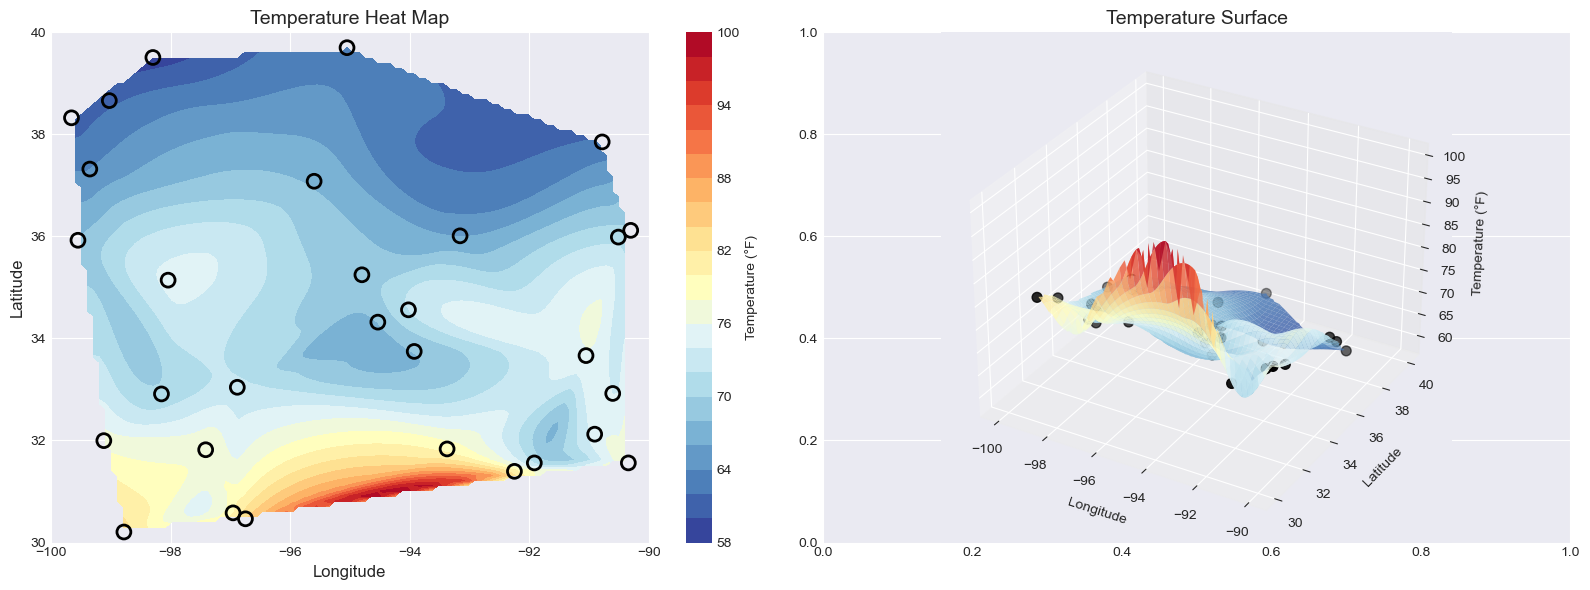

Applications:
  - Weather forecasting
  - Climate analysis
  - Agricultural planning
  - Energy demand prediction


In [4]:
# Simulate weather stations
np.random.seed(42)
n_stations = 30

# Stations in region (lat: 30-40, lon: -100 to -90)
lats = np.random.uniform(30, 40, n_stations)
lons = np.random.uniform(-100, -90, n_stations)

# Temperature (cooler in north, warmer in south)
temps = 60 + (40 - lats) * 2 + np.random.randn(n_stations) * 3

print("Weather Station Temperature Mapping")
print(f"  {n_stations} stations")
print(f"  Region: 30°-40°N, 90°W-100°W")
print(f"  Temperature range: {temps.min():.1f}°F - {temps.max():.1f}°F\n")

# Create fine grid for interpolation
lat_grid = np.linspace(30, 40, 100)
lon_grid = np.linspace(-100, -90, 100)
Lat_grid, Lon_grid = np.meshgrid(lat_grid, lon_grid)

# Interpolate
Temp_grid = interpolate.griddata(
    (lats, lons), temps, (Lat_grid, Lon_grid), method='cubic'
)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heat map
im = axes[0].contourf(Lon_grid, Lat_grid, Temp_grid, levels=20, cmap='RdYlBu_r')
axes[0].scatter(lons, lats, c=temps, s=100, edgecolors='black', 
               linewidths=2, cmap='RdYlBu_r', vmin=Temp_grid.min(), 
               vmax=Temp_grid.max(), zorder=5)
axes[0].set_xlabel('Longitude', fontsize=12)
axes[0].set_ylabel('Latitude', fontsize=12)
axes[0].set_title('Temperature Heat Map', fontsize=14)
plt.colorbar(im, ax=axes[0], label='Temperature (°F)')

# 3D surface
ax3d = fig.add_subplot(122, projection='3d')
surf = ax3d.plot_surface(Lon_grid, Lat_grid, Temp_grid, 
                        cmap='RdYlBu_r', alpha=0.8)
ax3d.scatter(lons, lats, temps, c='black', s=50, zorder=10)
ax3d.set_xlabel('Longitude')
ax3d.set_ylabel('Latitude')
ax3d.set_zlabel('Temperature (°F)')
ax3d.set_title('Temperature Surface', fontsize=14)

plt.tight_layout()
plt.show()

print("Applications:")
print("  - Weather forecasting")
print("  - Climate analysis")
print("  - Agricultural planning")
print("  - Energy demand prediction")

## Real Example: Options Volatility Surface

**Finance application**: Implied volatility varies with:
- Strike price (moneyness)
- Time to maturity

**Data**: Sparse observations (traded options)

**Goal**: Smooth surface for pricing non-traded strikes/maturities

**Challenge**: Volatility smile/skew patterns

Options Implied Volatility Surface
  Spot price: $100
  9 strikes × 4 maturities
  36 traded options

Surface statistics:
  Vol range: 19.47% - 25.44%
  ATM 30-day vol: 19.77%
  ATM 180-day vol: 25.44%


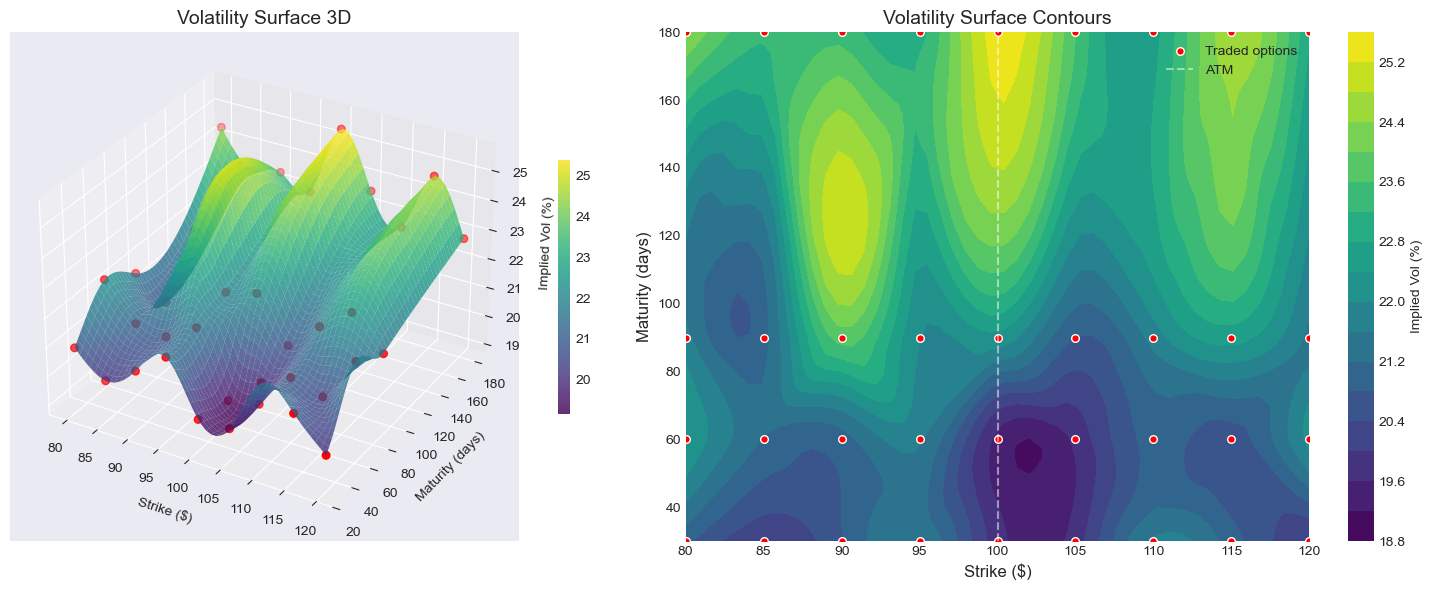


Volatility surface enables:
  - Pricing non-traded options
  - Risk management (Greeks)
  - Arbitrage detection
  - Market making


In [5]:
# Simulate implied volatility data
# Spot price = 100
np.random.seed(42)

# Traded options (strike, maturity in days)
strikes = np.array([80, 85, 90, 95, 100, 105, 110, 115, 120] * 4)
maturities = np.repeat([30, 60, 90, 180], 9)

# Implied volatility (volatility smile + term structure)
# Higher vol for OTM options, term structure
moneyness = strikes / 100  # Relative to spot
vol_smile = 0.20 + 0.10 * (moneyness - 1)**2  # Smile
vol_term = 1 + 0.1 * np.log(maturities / 30)    # Term structure
impl_vol = vol_smile * vol_term + np.random.randn(len(strikes)) * 0.01

print("Options Implied Volatility Surface")
print(f"  Spot price: $100")
print(f"  {len(np.unique(strikes))} strikes × {len(np.unique(maturities))} maturities")
print(f"  {len(strikes)} traded options\n")

# Create grid for surface
strike_grid = np.linspace(80, 120, 50)
maturity_grid = np.linspace(30, 180, 50)
Strike_grid, Maturity_grid = np.meshgrid(strike_grid, maturity_grid)

# Interpolate volatility surface
Vol_surface = interpolate.griddata(
    (strikes, maturities), impl_vol, 
    (Strike_grid, Maturity_grid), method='cubic'
)

print("Surface statistics:")
print(f"  Vol range: {impl_vol.min()*100:.2f}% - {impl_vol.max()*100:.2f}%")
print(f"  ATM 30-day vol: {impl_vol[(strikes==100) & (maturities==30)].mean()*100:.2f}%")
print(f"  ATM 180-day vol: {impl_vol[(strikes==100) & (maturities==180)].mean()*100:.2f}%")

# Visualize
fig = plt.figure(figsize=(16, 6))

# 3D surface
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(Strike_grid, Maturity_grid, Vol_surface*100,
                       cmap='viridis', alpha=0.8)
ax1.scatter(strikes, maturities, impl_vol*100, c='red', s=30, zorder=10)
ax1.set_xlabel('Strike ($)')
ax1.set_ylabel('Maturity (days)')
ax1.set_zlabel('Implied Vol (%)')
ax1.set_title('Volatility Surface 3D', fontsize=14)
plt.colorbar(surf, ax=ax1, shrink=0.5)

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(Strike_grid, Maturity_grid, Vol_surface*100,
                      levels=15, cmap='viridis')
ax2.scatter(strikes, maturities, c='red', s=30, edgecolors='white',
           linewidths=1, label='Traded options')
ax2.axvline(100, color='white', linestyle='--', alpha=0.5, label='ATM')
ax2.set_xlabel('Strike ($)', fontsize=12)
ax2.set_ylabel('Maturity (days)', fontsize=12)
ax2.set_title('Volatility Surface Contours', fontsize=14)
ax2.legend(fontsize=10)
plt.colorbar(contour, ax=ax2, label='Implied Vol (%)')

plt.tight_layout()
plt.show()

print("\nVolatility surface enables:")
print("  - Pricing non-traded options")
print("  - Risk management (Greeks)")
print("  - Arbitrage detection")
print("  - Market making")

## Summary

### Method Selection:

| Data Type | Method | Function |
|-----------|--------|----------|
| **Regular grid** | Fast, efficient | `RegularGridInterpolator` |
| **Scattered** | Triangulation | `griddata` |
| **Large scattered** | RBF (slower) | `Rbf` |

### Functions:

```python
from scipy.interpolate import RegularGridInterpolator, griddata

# Regular grid (fast)
f = RegularGridInterpolator((x, y), z, method='linear')
z_new = f(points)  # points: (N, 2) array

# Scattered data
z_grid = griddata(
    (x_scatter, y_scatter),  # Known points
    z_scatter,                # Known values
    (X_grid, Y_grid),        # Query points
    method='cubic'            # 'linear', 'nearest', 'cubic'
)
```

### Interpolation Methods:

**griddata methods**:
- `'nearest'`: Voronoi, blocky but fast
- `'linear'`: Delaunay triangulation, good default
- `'cubic'`: Smooth but slower, can overshoot

### Applications:

✓ **Image processing**: Upscaling, rotation, warping  
✓ **GIS**: Elevation maps, temperature fields  
✓ **Finance**: Volatility surfaces, yield curves  
✓ **Physics**: Field interpolation, simulation data  
✓ **ML**: Feature engineering, data augmentation  

### Best Practices:

✓ **Regular grid**: Use `RegularGridInterpolator` (much faster)  
✓ **Scattered**: Start with linear, try cubic if need smoothness  
✓ **Check NaN**: Extrapolation outside convex hull = NaN  
✓ **Normalize**: Scale x, y to similar range  
✓ **Visualize**: Plot to verify reasonable surface  

### Common Issues:

⚠️ **NaN in output**: Query points outside convex hull  
⚠️ **Slow cubic**: Use linear for large datasets  
⚠️ **Oscillations**: Scattered cubic can overshoot  
⚠️ **Memory**: Large grids need careful handling  

### Extensions:

- **RBF**: Radial basis functions (smooth, global)
- **CloughTocher2DInterpolator**: Piecewise cubic (C¹)
- **LinearNDInterpolator**: N-dimensional
- **3D and higher**: Same concepts extend